In [1]:
# import modules 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import PIL
import io
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# read ESPON LOGO 
im = plt.imread('ESPON images/espon-logo.png') # insert local ESPON logo.

In [7]:
# make the base map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

/c/Users/mhachaichi/Documents/ESPON-DATA/03_Figures/01_Animated Maps


## 1. Cases

In [37]:
## Read the data 
# Cases

cases = pd.read_excel('../../02_Data/02_Pandemic variables/01_Cases/EU_Cases_Weekly_Unstacked.xlsx')
cases.rename(columns = {"Unnamed: 0": 'nuts_id'}, inplace= True)
cases.index = cases.nuts_id
cases.drop('nuts_id', axis =1, inplace = True)
# # Exc. mortality 
# cases
# # Deaths 

In [38]:
cases

,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,2020-03-15,2020-03-22,...,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21,2021-11-28,2021-12-05,2021-12-12,2021-12-19
nuts_id,,,,,,,,,,,,,,,,,,,,,
AT111,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,5.0,...,23.0,56.0,87.0,203.0,294.0,277.0,271.0,146.0,64.0,9.0
AT112,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,5.0,27.0,...,165.0,267.0,455.0,773.0,911.0,1250.0,921.0,627.0,295.0,40.0
AT113,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,21.0,...,88.0,152.0,217.0,558.0,584.0,691.0,590.0,392.0,221.0,30.0
AT121,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,31.0,87.0,...,1105.0,1549.0,2298.0,2802.0,3676.0,3890.0,2677.0,1603.0,914.0,96.0
AT122,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,77.0,...,331.0,784.0,1173.0,1969.0,2858.0,3043.0,2291.0,1515.0,892.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EL411,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,59.0,87.0,84.0,186.0,201.0,251.0,274.0,291.0,278.0,NaN
EL533,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,10.0,48.0,94.0,128.0,103.0,85.0,103.0,39.0,42.0,NaN
EL541,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,176.0,260.0,282.0,558.0,578.0,511.0,455.0,391.0,325.0,NaN


In [81]:
# read shape file 
# shape = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/CovidSubntlEURO/CovidSubntlEURO_v3.2.shp')
covid = gpd.read_file('../../02_Data/01_GIS/02_Full file/Cases_shape.shp')
# read shape file by ESPON
# shp0 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/ESPON MAPS/nuts-version2016-level0.shp')
# shp1 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/ESPON MAPS/nuts-version2016-level1.shp')
# shp2 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/ESPON MAPS/nuts-version2016-level2.shp')
# shp3 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/ESPON MAPS/nuts-version2016-level3.shp')

In [82]:
cases.dropna(thresh = len(cases) -350, axis = 1, inplace= True)
cases = abs(cases)

In [83]:
# turn dataframes into GeoDataFrames 
geo_cases = gpd.GeoDataFrame(pd.merge(cases, covid, left_on = cases.index, right_on = 'NUTS_ID'))

In [84]:
geo_cases

,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00,2020-05-10 00:00:00,...,2021-10-24 00:00:00,2021-10-31 00:00:00,2021-11-07 00:00:00,2021-11-14 00:00:00,2021-11-21 00:00:00,2021-11-28 00:00:00,2021-12-05 00:00:00,2021-12-12 00:00:00,NUTS_ID,geometry
0,0.0,0.0,5.0,10.0,3.0,4.0,3.0,0.0,1.0,0.0,...,56.0,87.0,203.0,294.0,277.0,271.0,146.0,64.0,AT111,"POLYGON ((16.64622 47.44660, 16.47151 47.40072..."
1,4.0,5.0,27.0,51.0,27.0,10.0,9.0,5.0,3.0,2.0,...,267.0,455.0,773.0,911.0,1250.0,921.0,627.0,295.0,AT112,"POLYGON ((17.16080 48.00666, 17.10875 47.97548..."
2,0.0,3.0,21.0,52.0,27.0,24.0,20.0,9.0,6.0,0.0,...,152.0,217.0,558.0,584.0,691.0,590.0,392.0,221.0,AT113,"POLYGON ((16.43376 47.35292, 16.48128 47.28522..."
3,0.0,31.0,87.0,241.0,120.0,78.0,23.0,9.0,3.0,2.0,...,1549.0,2298.0,2802.0,3676.0,3890.0,2677.0,1603.0,914.0,AT121,"POLYGON ((15.50976 48.32004, 15.51332 48.29037..."
4,0.0,5.0,77.0,113.0,67.0,55.0,19.0,5.0,10.0,19.0,...,784.0,1173.0,1969.0,2858.0,3043.0,2291.0,1515.0,892.0,AT122,"POLYGON ((16.39115 47.88213, 16.29542 47.74623..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,87.0,84.0,186.0,201.0,251.0,274.0,291.0,278.0,EL411,"MULTIPOLYGON (((26.60348 39.01879, 26.40210 38..."
1229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,94.0,128.0,103.0,85.0,103.0,39.0,42.0,EL533,"POLYGON ((21.82179 40.69669, 21.78510 40.61676..."
1230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,260.0,282.0,558.0,578.0,511.0,455.0,391.0,325.0,EL541,"MULTIPOLYGON (((21.37289 39.17461, 21.25817 39..."
1231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.0,154.0,328.0,263.0,358.0,402.0,405.0,397.0,EL542,"POLYGON ((20.39131 39.78848, 20.48108 39.75092..."


In [85]:
# change the CRS to Europe 
geo_cases = geo_cases.to_crs(epsg=3035) 
world = world.to_crs(epsg = 3035)
cities = cities.to_crs(epsg = 3035)

In [86]:
# Selecting only cities we want to see on the plot   
cities['x'] = cities['geometry'].x
cities['y'] = cities['geometry'].y
cities = cities[cities['x'] > 0.23e7]
cities = cities[cities['x'] < 0.67e7]
cities = cities[cities['y'] > 0.1e7]
cities = cities[cities['y'] < 0.545e7]
# Delete these cities from the plot 
cities = cities[~cities['name'].isin(['Beirut', 'Vatican City', 'Cairo', 'Jerusalem', 'Tripoli', 'Zagreb', 'Bratislava'])]

In [87]:
source="""Regional level: NUTS 2/3 v2021.
Source: WHO EPISTAT, NPGEO, mscbs.gob.es.
santé-publique-France, statistichecoronavirus.it.
folkhalsomyndigheten, gov.scot, Korona.gov.sk.
data.gv.at, sso.dk, salute.gov.it."""

In [88]:
geo_cases.describe()

,2020-03-08,2020-03-15,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,...,2021-10-10,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21,2021-11-28,2021-12-05,2021-12-12
count,950.000000,1110.000000,1143.000000,1143.000000,1163.000000,1163.000000,1205.000000,1205.000000,1205.000000,1205.000000,...,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1223.000000,1180.000000,1169.000000
mean,18.344211,67.158559,128.048994,158.321085,160.245056,152.132416,103.214938,85.714523,64.571784,49.278838,...,517.083604,611.465097,745.862825,845.413149,954.377435,1191.758929,1498.565747,1629.109567,1741.744068,1515.368691
std,161.022367,528.683432,639.593778,470.392346,361.729408,331.495264,229.023257,187.506447,136.353572,111.291192,...,1070.176021,1239.261455,1299.794883,1294.455983,1455.324135,1782.091264,2274.158129,2434.728175,2476.791000,2119.873915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,10.000000,25.000000,25.000000,19.000000,10.000000,7.000000,4.000000,2.000000,...,79.000000,85.000000,123.000000,169.000000,211.750000,286.000000,354.000000,402.000000,412.750000,404.000000
50%,1.000000,9.000000,29.000000,66.000000,74.000000,61.000000,38.000000,27.000000,17.000000,12.000000,...,169.500000,201.000000,293.000000,380.000000,491.500000,627.000000,797.000000,881.000000,925.500000,802.000000
75%,5.000000,28.000000,82.000000,145.500000,171.000000,165.500000,117.000000,98.000000,61.000000,48.000000,...,513.250000,654.000000,885.000000,1010.500000,1102.250000,1347.500000,1652.750000,1764.500000,1986.000000,1602.000000
max,4598.000000,15737.000000,17710.000000,11144.000000,6850.000000,5227.000000,3277.000000,2546.000000,1697.000000,1308.000000,...,20196.000000,21968.000000,21191.000000,17945.000000,17905.000000,22749.000000,28766.000000,29055.000000,25625.000000,17663.000000


In [89]:
# Creating the bins 
bins = [-1, 0, 5, 100, 1000, 6647]
label = ['None', '< 5', '5-100', '100-1000', '> 1000']
for col in geo_cases.iloc[:, :-2]:
    geo_cases[col] = pd.cut(geo_cases[col], bins = bins, labels= label)

In [90]:
# set mamp general general aspect 

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'

In [91]:
## add the ESPON logo 
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [92]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 80

KeyError: '< 5'

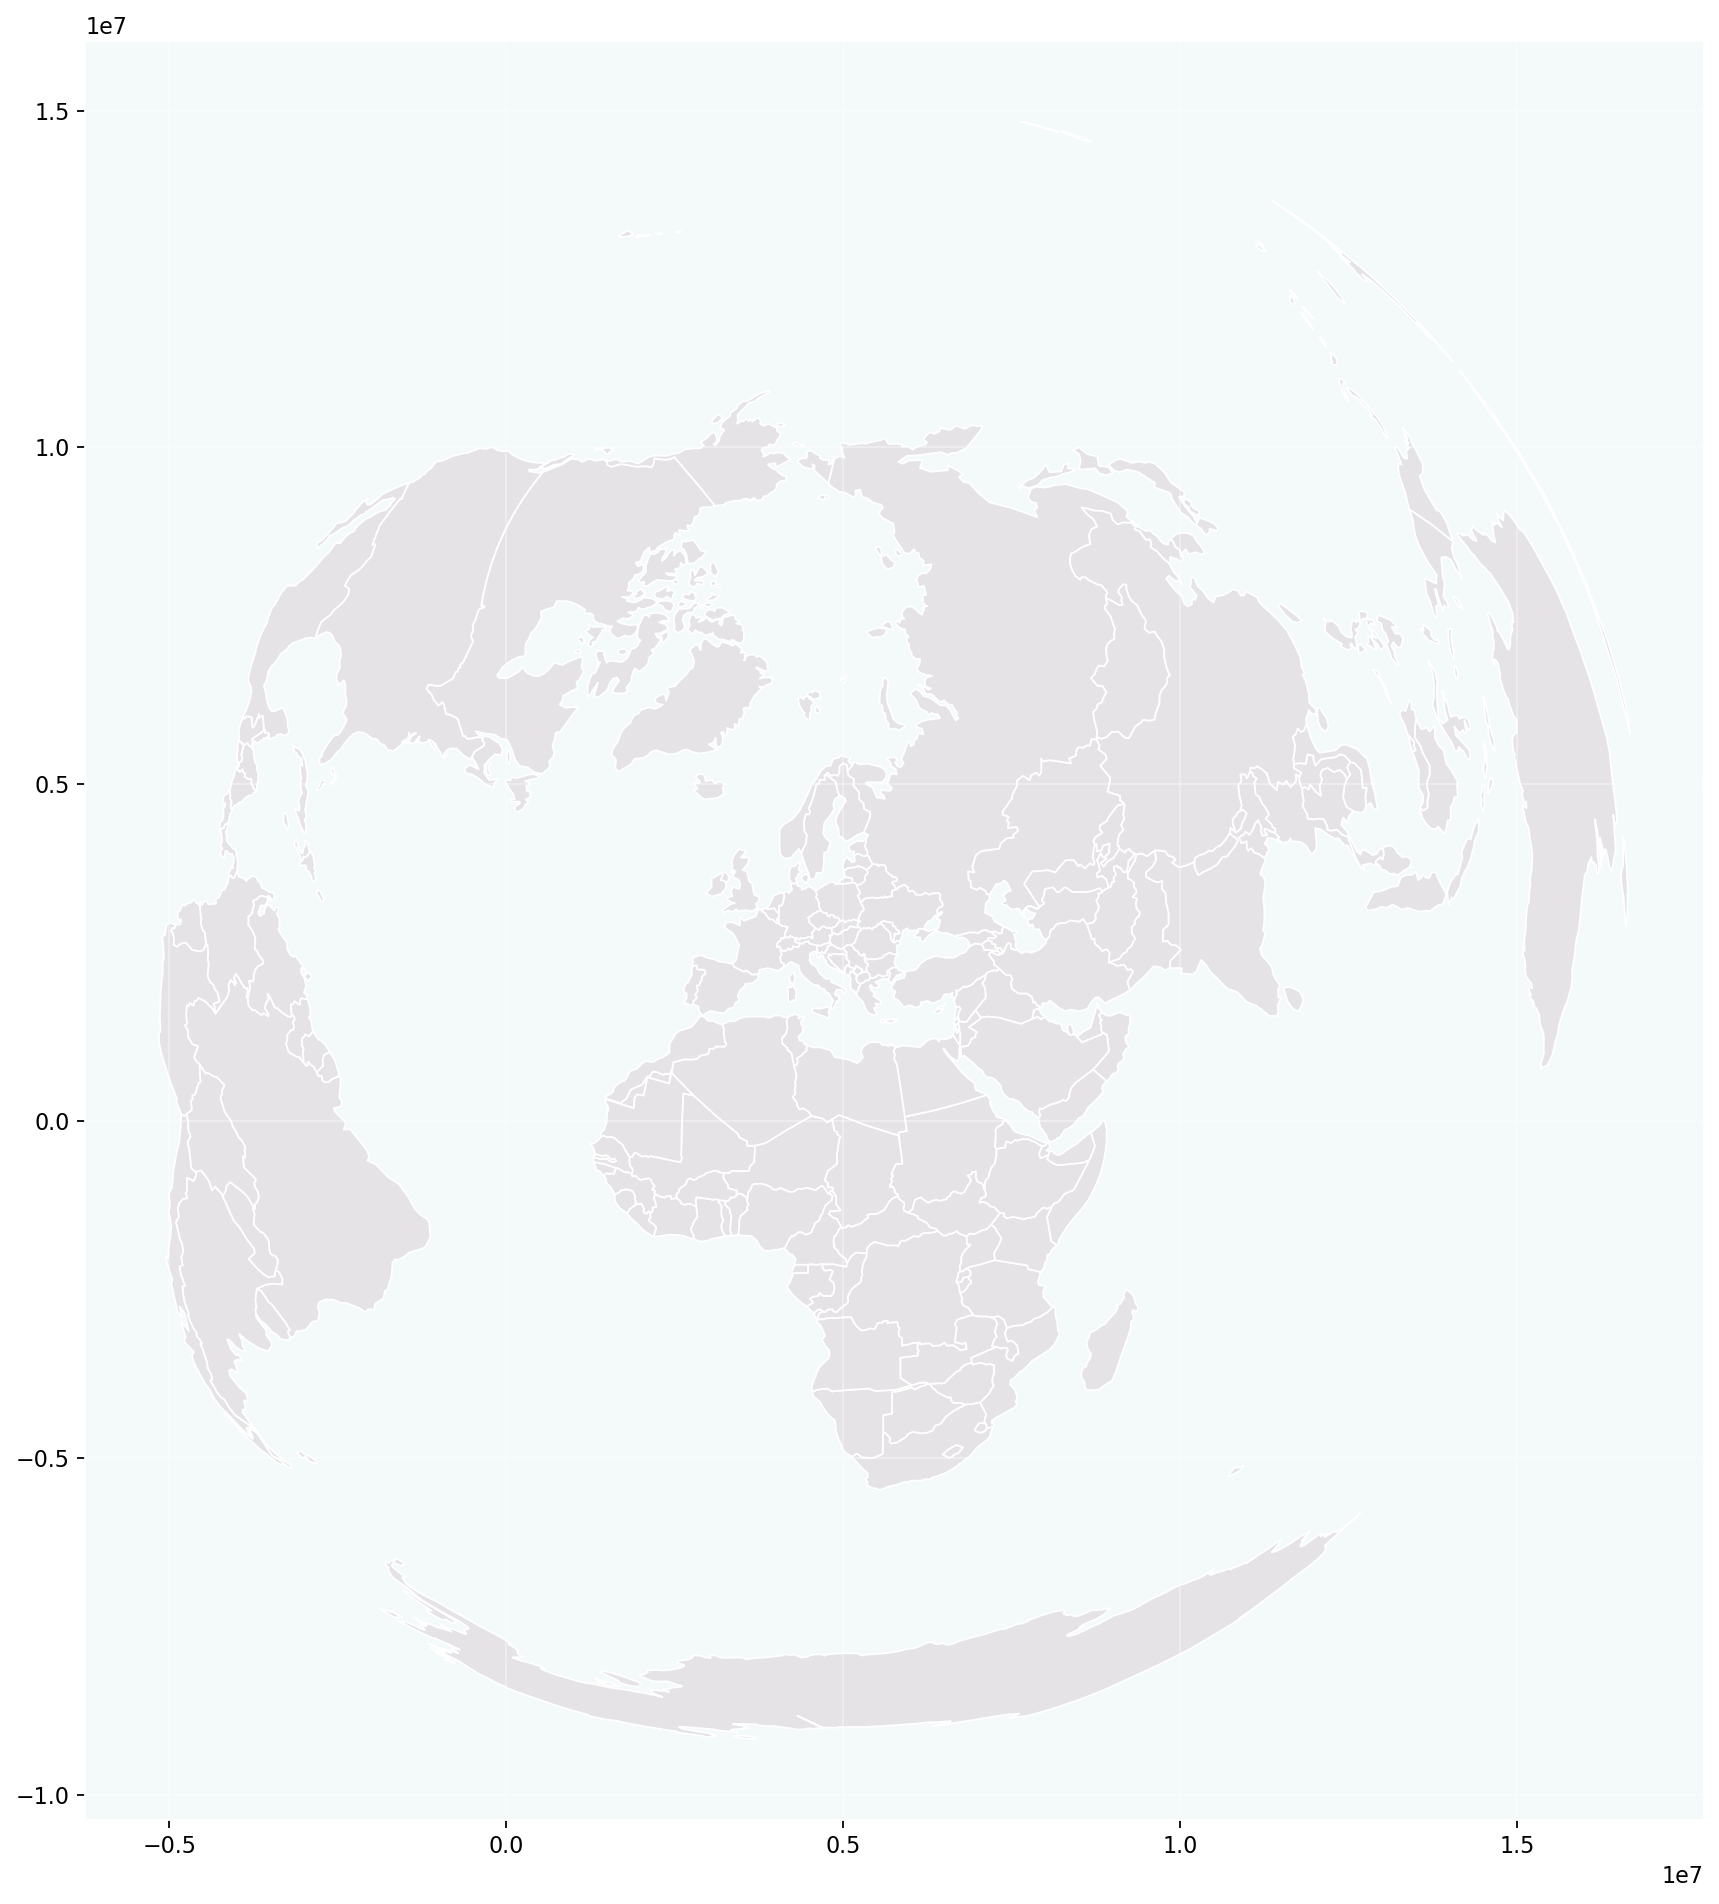

In [97]:
image_frames = []

# create the maps 
for i in geo_cases.iloc[:,5]:
    fig, ax = plt.subplots(figsize = (12, 12))
    # Set the global map 
    world.plot(color = '#e5e3e6', ax = ax, edgecolor = 'w', linewidth = 0.8)
    # set out map 
    geo_cases.plot(column = geo_cases[i], ax =ax, cmap = 'RdPu', legend = True, alpha = .4,
              linewidth = 0.3, edgecolor = 'w', categorical = True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })   
    # set out the countries boundaries 
    # world.boundary.plot()        
    # set the final limite
    plt.xlim(2.4e6, 6.6e6)
    plt.ylim(0.13e7, 0.545e7)
    # add capitals points 
    cities.plot(ax = ax, color = 'k', markersize = 1)
    for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
        ax.annotate(label, xy=(x, y), xytext=(1, 2), textcoords="offset points", fontsize = 6.5)
    # Disable scientific representation 
    ax.ticklabel_format(useOffset=False, style='plain')
    # legend 
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.24, 0)) 
    leg.get_frame().set_alpha(0)
    leg.set_title('NEW CASES')
    plt.title(f'  Weekly confirmed COVID-19 cases: {i}', fontweight = 'light',
            fontsize= 14, loc = 'left', color = '#054ea2')
    # Set outside the figure color 
    fig.patch.set_facecolor('#fbfdfe')
    #  Set source 
    fig.text(0.92, .055, source, ha='right', fontsize = 8)
    # add ESPON's title 
    plt.text(x = 3.5e6, y = 1.4e6, s = u"\u00A9 ESPON EGTC, 2021", fontsize = 10)
    # # add bleu lines 
    plt.vlines(x = 2.32e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
    plt.vlines(x = 2.32e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
    plt.vlines(x = 6.67e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

    plt.hlines(y = 1.01e6, xmin = 5.4e6, xmax = 6.7e6, color = '#054ea2', linewidth = 3 )
    plt.hlines(y = 5.44e6, xmin = 2.2e6, xmax = 3.4e6, color = '#054ea2', linewidth = 3 )
    # revome axis  
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # grid params 
    plt.tick_params(bottom = False, left = False)
    plt.grid(True, dash_capstyle = 'projecting')

    # add ESPON logo 
    newax = fig.add_axes([0.1, -0.045,0.15,0.22], anchor='NE', zorder=1)
    newax.imshow(im)
    newax.axis('off')
    plt.show()

    # img = ax.get_figure()
    # f = io.BytesIO()
    # img.savefig(f, format= 'png')
    # f.seek(0)
    # image_frames.append(PIL.Image.open(f))

In [ ]:
# create a GIF animation 
image_frames[0].save('Dynamic COVID-19 cases Map.gif', format = 'GIF', append_images = image_frames[1:],
                    save_all = True, duration = 500,
                     loop = 2)
f.close()

## 2. Deaths

## 3. Exc. Mortality 